# Persistence model #


In [ ]:
#Importing libraries
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from sklearn.metrics  import mean_squared_error, r2_score, mean_absolute_error, max_error
import pandas as pd
import numpy as np
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
rainfall_df = read_csv('/content/drive/MyDrive/Rainfallprediction/2013/Percip2013UHL.csv',  header=0,  index_col=0)

In [ ]:
rain_values = rainfall_df[['Time_Tag' , 'MeasuredValue']]

Exploratory data analysis

In [ ]:
rain_values.describe()

,MeasuredValue
count,22848.000000
mean,0.035373
std,0.338422
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,17.600000


In [ ]:
rain_values.dtypes

Time_Tag          object
MeasuredValue    float64
dtype: object

In [ ]:
rain_values.reset_index( inplace = True )

Investigation max value

In [ ]:
rain_values['MeasuredValue'].max() 

17.6

In [ ]:
rain_values['MeasuredValue']. idxmax() 

8666

In [ ]:
rain_values.head()

,index,Time_Tag,MeasuredValue
0,1,2013-04-09 12:10:00,0.0
1,2,2013-04-09 12:25:00,0.0
2,3,2013-04-09 12:40:00,0.0
3,4,2013-04-09 12:55:00,0.0
4,5,2013-04-09 13:10:00,0.0


In [ ]:
rain_values[(rain_values['Time_Tag'] > '2013-07-08 16:00:00') & (rain_values['Time_Tag'] < '2013-07-09')    ]

,index,Time_Tag,MeasuredValue
8656,8657,2013-07-08 16:10:00,0.0
8657,8658,2013-07-08 16:25:00,0.0
8658,8659,2013-07-08 16:40:00,11.0
8659,8660,2013-07-08 16:55:00,3.2
8660,8661,2013-07-08 17:10:00,1.0
8661,8662,2013-07-08 17:25:00,1.6
8662,8663,2013-07-08 17:40:00,0.6
8663,8664,2013-07-08 17:55:00,0.4
8664,8665,2013-07-08 18:10:00,0.4
8665,8666,2013-07-08 18:25:00,10.4


In [ ]:
rain_values[(rain_values['Time_Tag'] < '2013-07-09')   ]

,index,Time_Tag,MeasuredValue
0,1,2013-04-09 12:10:00,0.0
1,2,2013-04-09 12:25:00,0.0
2,3,2013-04-09 12:40:00,0.0
3,4,2013-04-09 12:55:00,0.0
4,5,2013-04-09 13:10:00,0.0
...,...,...,...
8683,8684,2013-07-08 22:55:00,0.0
8684,8685,2013-07-08 23:10:00,0.0
8685,8686,2013-07-08 23:25:00,0.0
8686,8687,2013-07-08 23:40:00,0.0


In [ ]:
len(rain_values[rain_values['MeasuredValue']!=0])

1104

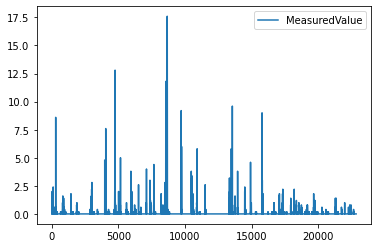

In [ ]:
rain_values.plot()


Selection of warm period

In [ ]:
rain_warm= rain_values[ (rain_values['Time_Tag']  > 	'2013-04-09') & (rain_values['Time_Tag']  < 	'2013-11-03') ]

In [ ]:
len(rain_warm)

19920

In [ ]:
rain_warm.reset_index(drop=True, inplace= True)

In [ ]:
rain_warm.head()

,Time_Tag,MeasuredValue
0,2013-04-09 12:10:00,0.0
1,2013-04-09 12:25:00,0.0
2,2013-04-09 12:40:00,0.0
3,2013-04-09 12:55:00,0.0
4,2013-04-09 13:10:00,0.0


In [ ]:
# 70% of the total amount of rainfall :  41831 
train  = rain_warm.iloc[:13944]
test = rain_warm.iloc[13944:]

In [ ]:
train.tail()

,Time_Tag,MeasuredValue
13939,2013-09-01 16:55:00,0.0
13940,2013-09-01 17:10:00,0.0
13941,2013-09-01 17:25:00,0.0
13942,2013-09-01 17:40:00,0.0
13943,2013-09-01 17:55:00,0.0


In [ ]:
test.head()

,Time_Tag,MeasuredValue
13944,2013-09-01 18:10:00,0.0
13945,2013-09-01 18:25:00,0.0
13946,2013-09-01 18:40:00,0.0
13947,2013-09-01 18:55:00,0.0
13948,2013-09-01 19:10:00,3.8


In [ ]:
len(train[train['MeasuredValue']!=0])

663

In [ ]:
len(test[test['MeasuredValue']!=0])

358

In [ ]:
values = pd.DataFrame(test.MeasuredValue)
len(values)

5976

In [ ]:
#Persistence model

def model_persistence(x):
    return x

# 15 min *prediction*

In [ ]:
XY_rain = pd.concat([values.shift(1), values], axis=1)
XY_rain.columns = ['t', 't+1']

In [ ]:
XY_rain.reset_index(drop=True , inplace=True )
XY_rain.head(5)

,t,t+1
0,NaN,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,3.8


In [ ]:
#removing NaN values 
XY_rain.drop(0 , axis=0 , inplace=True)

In [ ]:
XY_rain.reset_index(drop= True, inplace=True)
XY_rain.head()

,t,t+1
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,3.8
4,3.8,3.6


In [ ]:
predictions  = XY_rain['t'].apply(lambda x : model_persistence(x))

In [ ]:
predictions
mre_score = max_error (XY_rain['t+1'], predictions)
print('Test MRE: %.3f' % mre_score)
mae_score = mean_absolute_error (XY_rain['t+1'], predictions)
print('Test MAE: %.3f' % mae_score)
rmse_score = np.sqrt(mean_squared_error( XY_rain['t+1'], predictions))
print('Test RMSE: %.3f' % rmse_score)
r2 = r2_score(XY_rain['t+1'], predictions)
print('Test R2: %.3f' % r2)


Test MRE: 8.400
Test MAE: 0.033
Test RMSE: 0.221
Test R2: -0.050


In [ ]:
#Analysis of performance on Test data 
y = XY_rain['t+1']
y_hat = predictions

In [ ]:
y_y_hat = pd.DataFrame({'y':y , 'y_hat':y_hat} )

In [ ]:
pd.set_option('display.max_rows', 100)

In [ ]:
y_y_hat.iloc[1:99]

,y,y_hat
1,0.0,0.0
2,0.0,0.0
3,3.8,0.0
4,3.6,3.8
5,1.8,3.6
6,0.0,1.8
7,0.4,0.0
8,0.2,0.4
9,0.0,0.2
10,0.0,0.0


In [ ]:
y_y_hat['residual_error'] = y_y_hat['y'] - y_y_hat['y_hat']

In [ ]:
y_y_hat.describe()

,y,y_hat,residual_error
count,5975.000000,5975.000000,5.975000e+03
mean,0.032770,0.032770,-1.207774e-19
std,0.215387,0.215387,2.206907e-01
min,0.000000,0.000000,-8.000000e+00
25%,0.000000,0.000000,0.000000e+00
50%,0.000000,0.000000,0.000000e+00
75%,0.000000,0.000000,0.000000e+00
max,9.000000,9.000000,8.400000e+00


In [ ]:
y_y_hat [abs(y_y_hat['residual_error'])>3]

,y,y_hat,residual_error
3,3.8,0.0,3.8
973,4.6,0.2,4.4
974,0.8,4.6,-3.8
1838,9.0,0.6,8.4
1839,1.0,9.0,-8.0


In [ ]:
for i in range(1,99):
  print( y [i] )

0.0
0.0
3.8
3.6
1.8
0.0
0.4
0.2
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.2
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [ ]:
for i in range(1,99):
  print( y_hat [i] )

0.0
0.0
0.0
3.8
3.6
1.8
0.0
0.4
0.2
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.2
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [ ]:
predictions
mre_score = max_error (XY_rain['t+1'], predictions)
print('Test MRE: %.3f' % mre_score)
mae_score = mean_absolute_error (XY_rain['t+1'], predictions)
print('Test MAE: %.3f' % mae_score)
rmse_score = np.sqrt(mean_squared_error( XY_rain['t+1'], predictions))
print('Test RMSE: %.3f' % rmse_score)
r2 = r2_score(XY_rain['t+1'], predictions)
print('Test R2: %.3f' % r2)


Test MRE: 8.400
Test MAE: 0.033
Test RMSE: 0.221
Test R2: -0.050


In [ ]:
# Scores on rain and no rain tuples seperately 

results  = pd.DataFrame( { 'true' :XY_rain['t+1'] , 'prediction':predictions } )
print ("Scores on rain tupes \n")

results_true_rain = results[results['true']!=0].true
results_prediction_rain = results[results['true']!=0].prediction
mre_score = max_error ( results_true_rain,results_prediction_rain )
print('Test MRE: %.3f' % mre_score)
mae_score = mean_absolute_error (results_true_rain, results_prediction_rain)
print('Test MAE: %.3f' % mae_score)
rmse_score = np.sqrt(mean_squared_error( results_true_rain, results_prediction_rain))
print('Test RMSE: %.3f' % rmse_score)
r2 = r2_score(results_true_rain, results_prediction_rain)
print('Test R2: %.3f' % r2)


print ("\n Scores on no-rain tupes \n")
results_true_no_rain = results[results['true']==0].true
results_prediction_no_rain = results[results['true']==0].prediction

mre_score = max_error (results_true_no_rain, results_prediction_no_rain)
print('Test MRE: %.3f' % mre_score)
mae_score = mean_absolute_error (results_true_no_rain, results_prediction_no_rain)
print('Test MAE: %.3f' % mae_score)
rmse_score = np.sqrt(mean_squared_error( results_true_no_rain, results_prediction_no_rain))
print('Test RMSE: %.3f' % rmse_score)
r2 = r2_score(results_true_no_rain, results_prediction_no_rain)
print('Test R2: %.3f' % r2)




Scores on rain tupes 

Test MRE: 8.400
Test MAE: 0.423
Test RMSE: 0.866
Test R2: -0.523

 Scores on no-rain tupes 

Test MRE: 1.800
Test MAE: 0.008
Test RMSE: 0.063
Test R2: 0.000


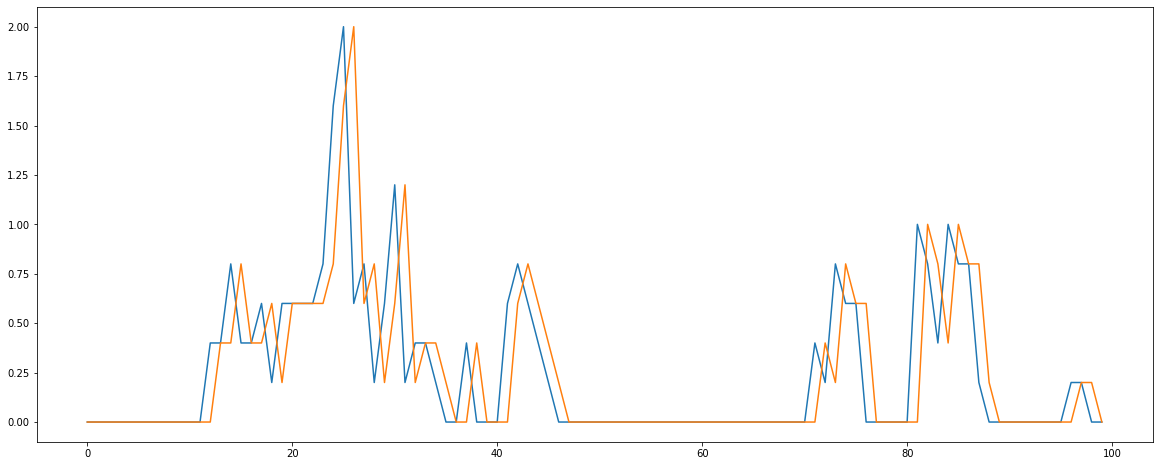

In [ ]:
from matplotlib.pyplot import figure
test_y_crop = XY_rain['t+1'][:100]
predictions_crop = predictions[:100]
figure(figsize=(20, 8))
pyplot.plot( [x for x in test_y_crop])
pyplot.plot([x for x in predictions_crop])

# 30 min *prediction* 

In [ ]:
XY_rain = pd.concat([values.shift(2), values], axis=1)
XY_rain.columns = ['t', 't+2']

In [ ]:

XY_rain.head(5)

,t,t+2
13944,NaN,0.0
13945,NaN,0.0
13946,0.0,0.0
13947,0.0,0.0
13948,0.0,3.8


In [ ]:
#removing NaN values 
XY_rain.reset_index(drop= True, inplace=True)
XY_rain.drop([0,1] , axis=0 , inplace=True)

In [ ]:
XY_rain.reset_index(drop= True, inplace=True)
XY_rain.head()

,t,t+2
0,0.0,0.0
1,0.0,0.0
2,0.0,3.8
3,0.0,3.6
4,3.8,1.8


In [ ]:
predictions  = XY_rain['t'].apply(lambda x : model_persistence(x))

In [ ]:
predictions
mre_score = max_error (XY_rain['t+2'], predictions)
print('Test MRE: %.3f' % mre_score)
mae_score = mean_absolute_error (XY_rain['t+2'], predictions)
print('Test MAE: %.3f' % mae_score)
rmse_score = np.sqrt(mean_squared_error( XY_rain['t+2'], predictions))
print('Test RMSE: %.3f' % rmse_score)
r2 = r2_score(XY_rain['t+2'], predictions)
print('Test R2: %.3f' % r2)


Test MRE: 17.200
Test MAE: 0.044
Test RMSE: 0.383
Test R2: -0.283


In [ ]:
predictions
mre_score = max_error (XY_rain['t+2'], predictions)
print('Test MRE: %.3f' % mre_score)
mae_score = mean_absolute_error (XY_rain['t+2'], predictions)
print('Test MAE: %.3f' % mae_score)
rmse_score = np.sqrt(mean_squared_error( XY_rain['t+2'], predictions))
print('Test RMSE: %.3f' % rmse_score)
r2 = r2_score(XY_rain['t+2'], predictions)
print('Test R2: %.3f' % r2)


Test MRE: 8.800
Test MAE: 0.037
Test RMSE: 0.250
Test R2: -0.347


In [ ]:
# Scores on rain and no rain tuples seperately 

results  = pd.DataFrame( { 'true' :XY_rain['t+2'] , 'prediction':predictions } )
print ("Scores on rain tupes \n")

results_true_rain = results[results['true']!=0].true
results_prediction_rain = results[results['true']!=0].prediction
mre_score = max_error ( results_true_rain,results_prediction_rain )
print('Test MRE: %.3f' % mre_score)
mae_score = mean_absolute_error (results_true_rain, results_prediction_rain)
print('Test MAE: %.3f' % mae_score)
rmse_score = np.sqrt(mean_squared_error( results_true_rain, results_prediction_rain))
print('Test RMSE: %.3f' % rmse_score)
r2 = r2_score(results_true_rain, results_prediction_rain)
print('Test R2: %.3f' % r2)


print ("\n Scores on no-rain tupes \n")
results_true_no_rain = results[results['true']==0].true
results_prediction_no_rain = results[results['true']==0].prediction

mre_score = max_error (results_true_no_rain, results_prediction_no_rain)
print('Test MRE: %.3f' % mre_score)
mae_score = mean_absolute_error (results_true_no_rain, results_prediction_no_rain)
print('Test MAE: %.3f' % mae_score)
rmse_score = np.sqrt(mean_squared_error( results_true_no_rain, results_prediction_no_rain))
print('Test RMSE: %.3f' % rmse_score)
r2 = r2_score(results_true_no_rain, results_prediction_no_rain)
print('Test R2: %.3f' % r2)


Scores on rain tupes 

Test MRE: 8.800
Test MAE: 0.458
Test RMSE: 0.954
Test R2: -0.845

 Scores on no-rain tupes 

Test MRE: 3.600
Test MAE: 0.010
Test RMSE: 0.092
Test R2: 0.000


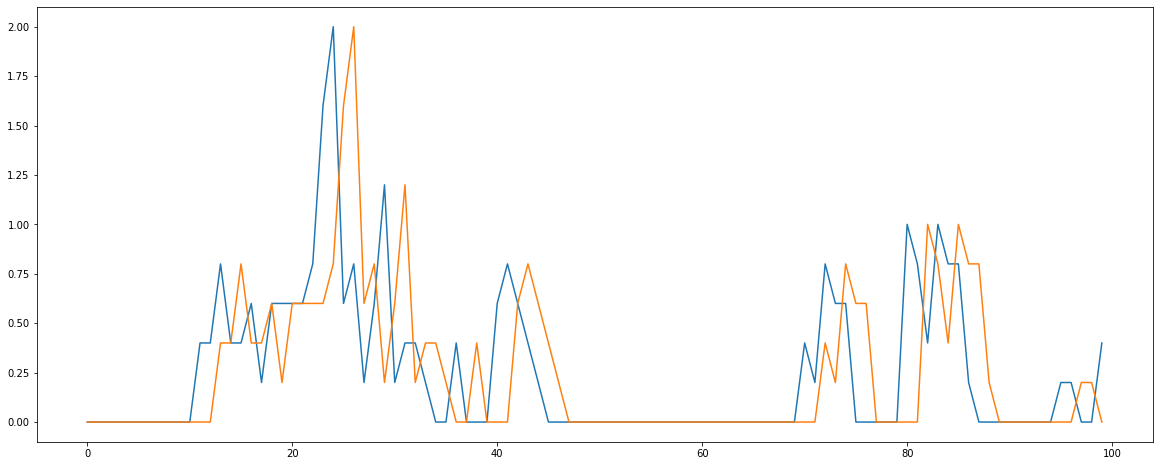

In [ ]:
from matplotlib.pyplot import figure
test_y_crop = XY_rain['t+2'][:100]
predictions_crop = predictions[:100]
figure(figsize=(20, 8))
pyplot.plot( [x for x in test_y_crop])
pyplot.plot([x for x in predictions_crop])

# 45 min *predictions*

In [ ]:
XY_rain = pd.concat([values.shift(3), values], axis=1)
XY_rain.columns = ['t', 't+3']

In [ ]:
XY_rain.head(5)

,t,t+3
13944,NaN,0.0
13945,NaN,0.0
13946,NaN,0.0
13947,0.0,0.0
13948,0.0,3.8


In [ ]:
#removing NaN values 
XY_rain.reset_index(drop= True, inplace=True)
XY_rain.drop([0,1,2] , axis=0 , inplace=True)

In [ ]:
XY_rain.reset_index(drop= True, inplace=True)
XY_rain.head()

,t,t+3
0,0.0,0.0
1,0.0,3.8
2,0.0,3.6
3,0.0,1.8
4,3.8,0.0


In [ ]:
predictions  = XY_rain['t'].apply(lambda x : model_persistence(x))

In [ ]:
predictions
mre_score = max_error (XY_rain['t+3'], predictions)
print('Test MRE: %.3f' % mre_score)
mae_score = mean_absolute_error (XY_rain['t+3'], predictions)
print('Test MAE: %.3f' % mae_score)
rmse_score = np.sqrt(mean_squared_error( XY_rain['t+3'], predictions))
print('Test RMSE: %.3f' % rmse_score)
r2 = r2_score(XY_rain['t+3'], predictions)
print('Test R2: %.3f' % r2)


Test MRE: 17.200
Test MAE: 0.049
Test RMSE: 0.422
Test R2: -0.553


In [ ]:
predictions
mre_score = max_error (XY_rain['t+3'], predictions)
print('Test MRE: %.3f' % mre_score)
mae_score = mean_absolute_error (XY_rain['t+3'], predictions)
print('Test MAE: %.3f' % mae_score)
rmse_score = np.sqrt(mean_squared_error( XY_rain['t+3'], predictions))
print('Test RMSE: %.3f' % rmse_score)
r2 = r2_score(XY_rain['t+3'], predictions)
print('Test R2: %.3f' % r2)


Test MRE: 9.000
Test MAE: 0.042
Test RMSE: 0.263
Test R2: -0.492


In [ ]:
# Scores on rain and no rain tuples seperately 

results  = pd.DataFrame( { 'true' :XY_rain['t+3'] , 'prediction':predictions } )
print ("Scores on rain tupes \n")

results_true_rain = results[results['true']!=0].true
results_prediction_rain = results[results['true']!=0].prediction
mre_score = max_error ( results_true_rain,results_prediction_rain )
print('Test MRE: %.3f' % mre_score)
mae_score = mean_absolute_error (results_true_rain, results_prediction_rain)
print('Test MAE: %.3f' % mae_score)
rmse_score = np.sqrt(mean_squared_error( results_true_rain, results_prediction_rain))
print('Test RMSE: %.3f' % rmse_score)
r2 = r2_score(results_true_rain, results_prediction_rain)
print('Test R2: %.3f' % r2)


print ("\n Scores on no-rain tupes \n")
results_true_no_rain = results[results['true']==0].true
results_prediction_no_rain = results[results['true']==0].prediction

mre_score = max_error (results_true_no_rain, results_prediction_no_rain)
print('Test MRE: %.3f' % mre_score)
mae_score = mean_absolute_error (results_true_no_rain, results_prediction_no_rain)
print('Test MAE: %.3f' % mae_score)
rmse_score = np.sqrt(mean_squared_error( results_true_no_rain, results_prediction_no_rain))
print('Test RMSE: %.3f' % rmse_score)
r2 = r2_score(results_true_no_rain, results_prediction_no_rain)
print('Test R2: %.3f' % r2)


Scores on rain tupes 

Test MRE: 8.200
Test MAE: 0.474
Test RMSE: 0.842
Test R2: -0.438

 Scores on no-rain tupes 

Test MRE: 9.000
Test MAE: 0.014
Test RMSE: 0.169
Test R2: 0.000


# 60 min *predictions*

In [ ]:
XY_rain = pd.concat([values.shift(4), values], axis=1)
XY_rain.columns = ['t', 't+4']

In [ ]:
XY_rain.head(5)

,t,t+4
13944,NaN,0.0
13945,NaN,0.0
13946,NaN,0.0
13947,NaN,0.0
13948,0.0,3.8


In [ ]:
#removing NaN values 
XY_rain.reset_index(drop= True, inplace=True)
XY_rain.drop([0,1,2,3] , axis=0 , inplace=True)

In [ ]:
XY_rain.reset_index(drop= True, inplace=True)
XY_rain.head()

,t,t+4
0,0.0,3.8
1,0.0,3.6
2,0.0,1.8
3,0.0,0.0
4,3.8,0.4


In [ ]:
predictions  = XY_rain['t'].apply(lambda x : model_persistence(x))

In [ ]:
predictions
mre_score = max_error (XY_rain['t+4'], predictions)
print('Test MRE: %.3f' % mre_score)
mae_score = mean_absolute_error (XY_rain['t+4'], predictions)
print('Test MAE: %.3f' % mae_score)
rmse_score = np.sqrt(mean_squared_error( XY_rain['t+4'], predictions))
print('Test RMSE: %.3f' % rmse_score)
r2 = r2_score(XY_rain['t+4'], predictions)
print('Test R2: %.3f' % r2)


Test MRE: 17.000
Test MAE: 0.052
Test RMSE: 0.441
Test R2: -0.700


In [ ]:
predictions
mre_score = max_error (XY_rain['t+4'], predictions)
print('Test MRE: %.3f' % mre_score)
mae_score = mean_absolute_error (XY_rain['t+4'], predictions)
print('Test MAE: %.3f' % mae_score)
rmse_score = np.sqrt(mean_squared_error( XY_rain['t+4'], predictions))
print('Test RMSE: %.3f' % rmse_score)
r2 = r2_score(XY_rain['t+4'], predictions)
print('Test R2: %.3f' % r2)

Test MRE: 9.000
Test MAE: 0.043
Test RMSE: 0.269
Test R2: -0.556


In [ ]:
# Scores on rain and no rain tuples seperately 

results  = pd.DataFrame( { 'true' :XY_rain['t+4'] , 'prediction':predictions } )
print ("Scores on rain tupes \n")

results_true_rain = results[results['true']!=0].true
results_prediction_rain = results[results['true']!=0].prediction
mre_score = max_error ( results_true_rain,results_prediction_rain )
print('Test MRE: %.3f' % mre_score)
mae_score = mean_absolute_error (results_true_rain, results_prediction_rain)
print('Test MAE: %.3f' % mae_score)
rmse_score = np.sqrt(mean_squared_error( results_true_rain, results_prediction_rain))
print('Test RMSE: %.3f' % rmse_score)
r2 = r2_score(results_true_rain, results_prediction_rain)
print('Test R2: %.3f' % r2)


print ("\n Scores on no-rain tupes \n")
results_true_no_rain = results[results['true']==0].true
results_prediction_no_rain = results[results['true']==0].prediction

mre_score = max_error (results_true_no_rain, results_prediction_no_rain)
print('Test MRE: %.3f' % mre_score)
mae_score = mean_absolute_error (results_true_no_rain, results_prediction_no_rain)
print('Test MAE: %.3f' % mae_score)
rmse_score = np.sqrt(mean_squared_error( results_true_no_rain, results_prediction_no_rain))
print('Test RMSE: %.3f' % rmse_score)
r2 = r2_score(results_true_no_rain, results_prediction_no_rain)
print('Test R2: %.3f' % r2)


Scores on rain tupes 

Test MRE: 9.000
Test MAE: 0.502
Test RMSE: 0.923
Test R2: -0.728

 Scores on no-rain tupes 

Test MRE: 9.000
Test MAE: 0.014
Test RMSE: 0.150
Test R2: 0.000
